In [297]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
from toolz.curried import *
import import_ipynb
from data_cleaning import load_ranking_df, load_athlete_df

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 200

In [354]:
rankings = load_ranking_df()
athletes = load_athlete_df()
ranked_athletes = rankings.merge(athletes, on=['ID', 'First Name', 'Last Name'])

def get_world():
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # Match the country codes of the world to our dataset
    world.loc[43, 'iso_a3'] = 'FRA'
    world.loc[121, 'iso_a3'] = 'GER'
    world.loc[127, 'iso_a3'] = 'SUI'
    world.loc[130, 'iso_a3'] = 'NED'
    world.loc[150, 'iso_a3'] = 'SLO'
    world.loc[8, 'iso_a3'] = 'INA'
    world.loc[21, 'iso_a3'] = 'NOR'
    world.loc[107, 'iso_a3'] = 'IRI'
    world.loc[126, 'iso_a3'] = 'CRO'
    world.loc[119, 'iso_a3'] = 'LAT'
    world.loc[147, 'iso_a3'] = 'PHI'
    world.loc[148, 'iso_a3'] = 'MAS'
    world.loc[122, 'iso_a3'] = 'BUL'
    world.loc[140, 'iso_a3'] = 'TPE'
    world.loc[123, 'iso_a3'] = 'GRE'
    world.loc[142, 'iso_a3'] = 'DEN'
    world.loc[25, 'iso_a3'] = 'RSA'
    world.loc[131, 'iso_a3'] = 'POR'
    world.loc[97, 'iso_a3'] = 'MGL'
    world.loc[10, 'iso_a3'] = 'CHI'
    world.loc[101, 'iso_a3'] = 'NEP'
    world.loc[77, 'iso_a3'] = 'LIB'
    return world

def plot_map(df, cmap, index, title, bar_label, europe=False):
    # Set up our plot
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    
    # Plot the world boundary
    world = get_world()
    world.boundary.plot(edgecolor='black', ax=ax, linewidth=1)
    if europe:
        ax.set_xlim(-25, 50)
        ax.set_ylim(25, 75)

    # Plot the data
    norm = LogNorm(vmin=min(df[index]), vmax=max(df[index]))
    cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax, label=bar_label)
    df.plot(column=index, ax=ax, norm=norm, cmap=cmap)

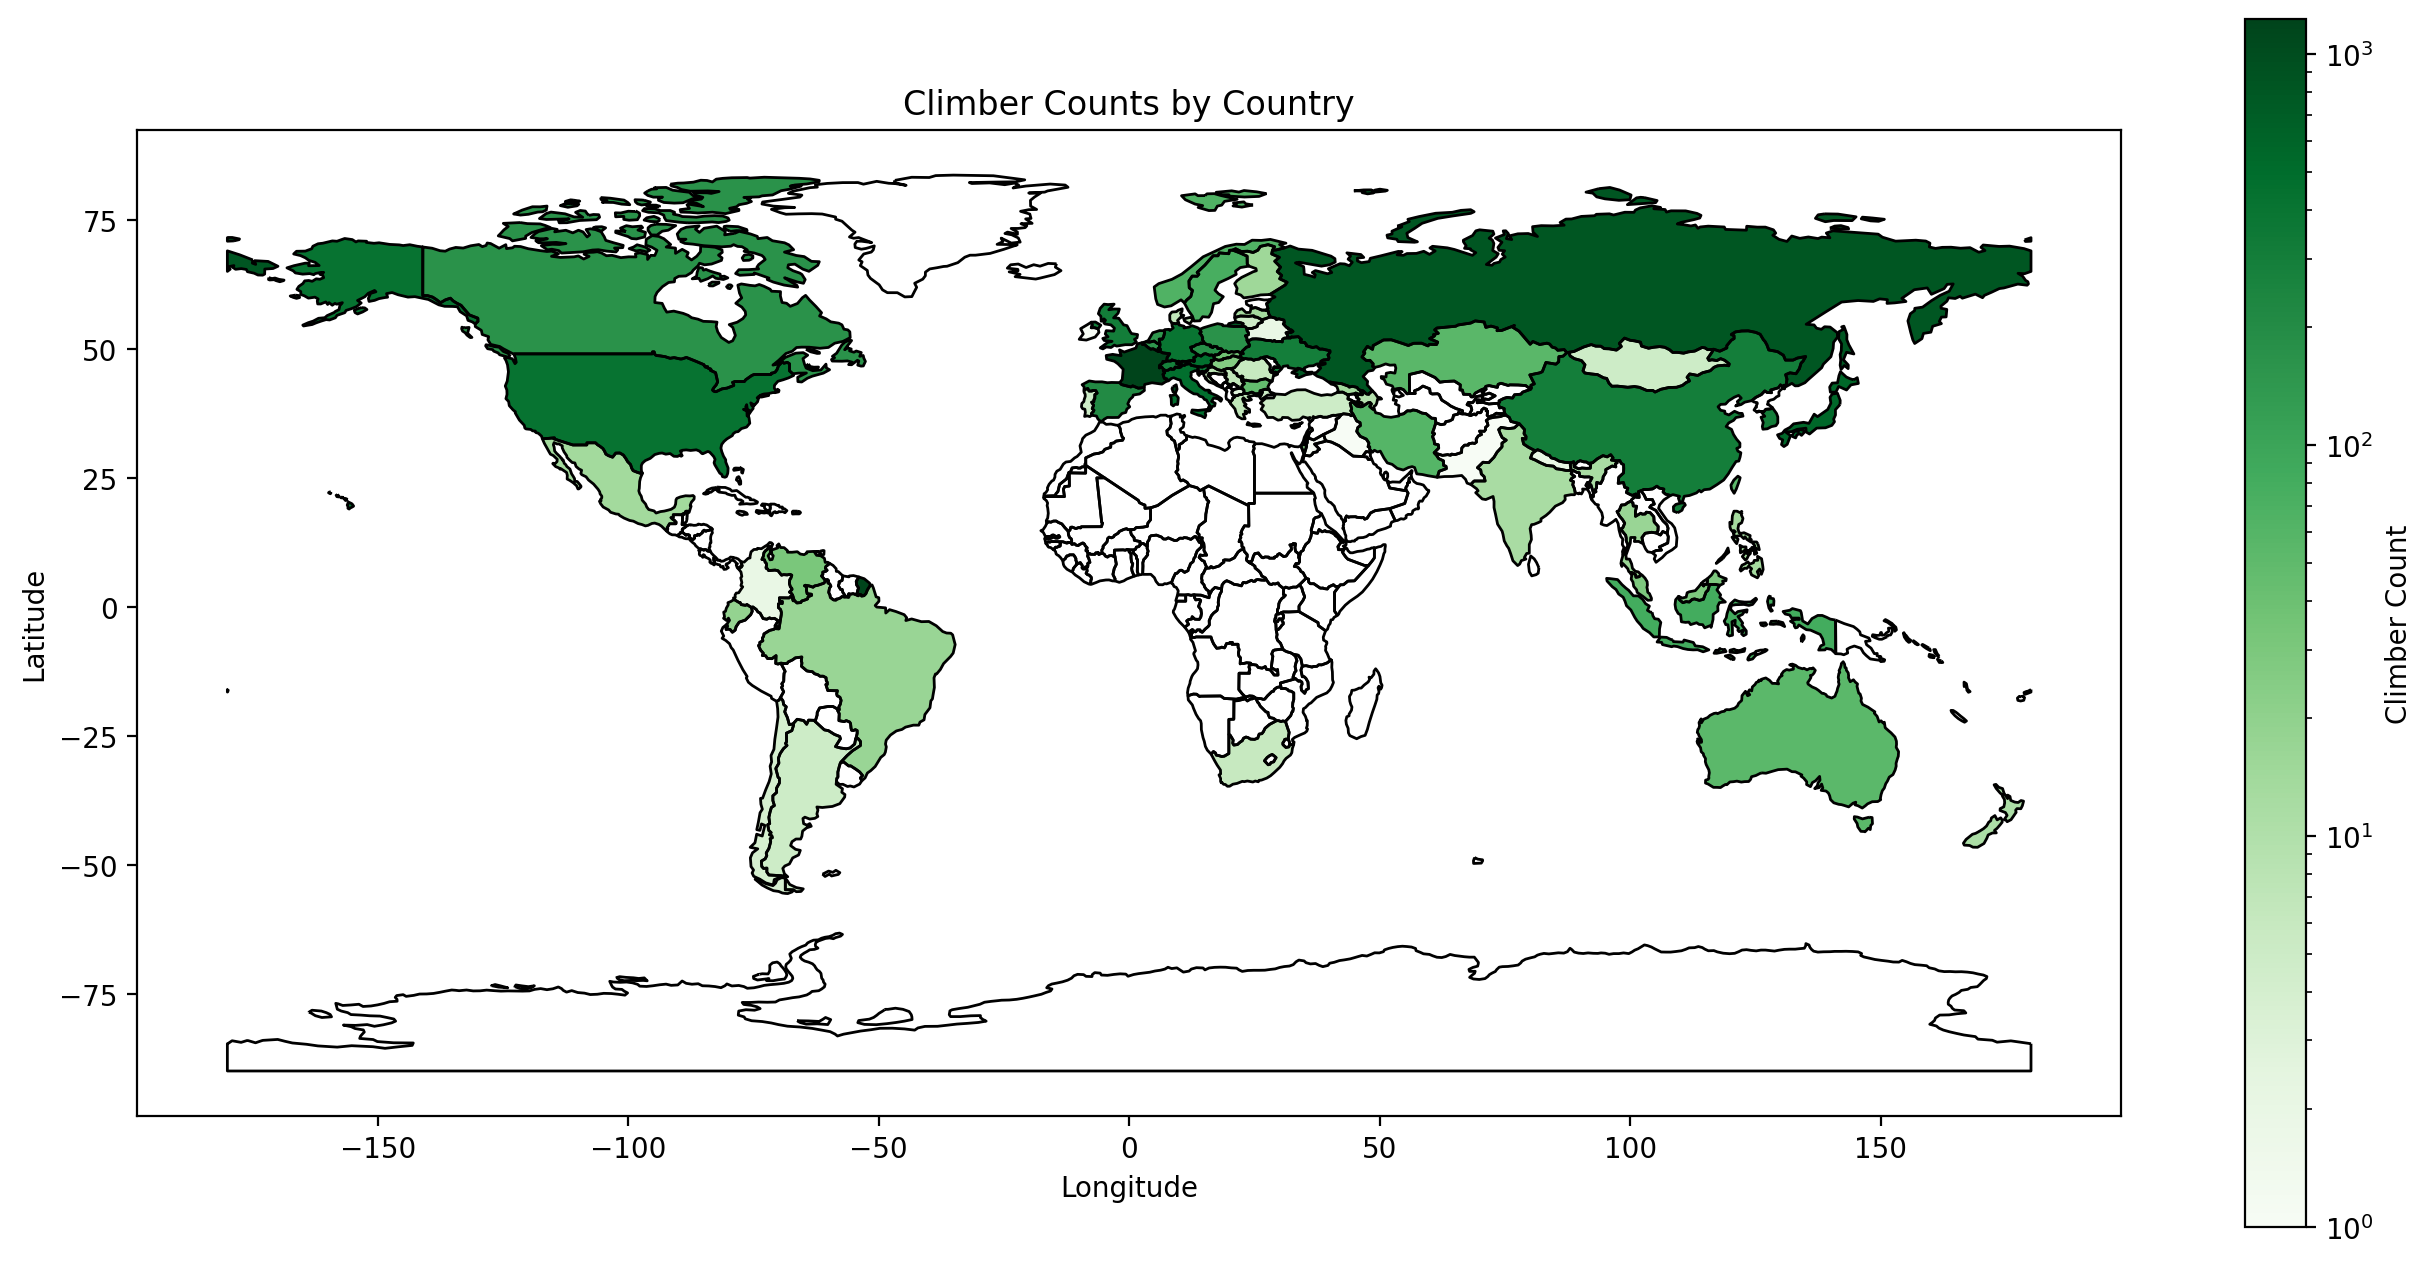

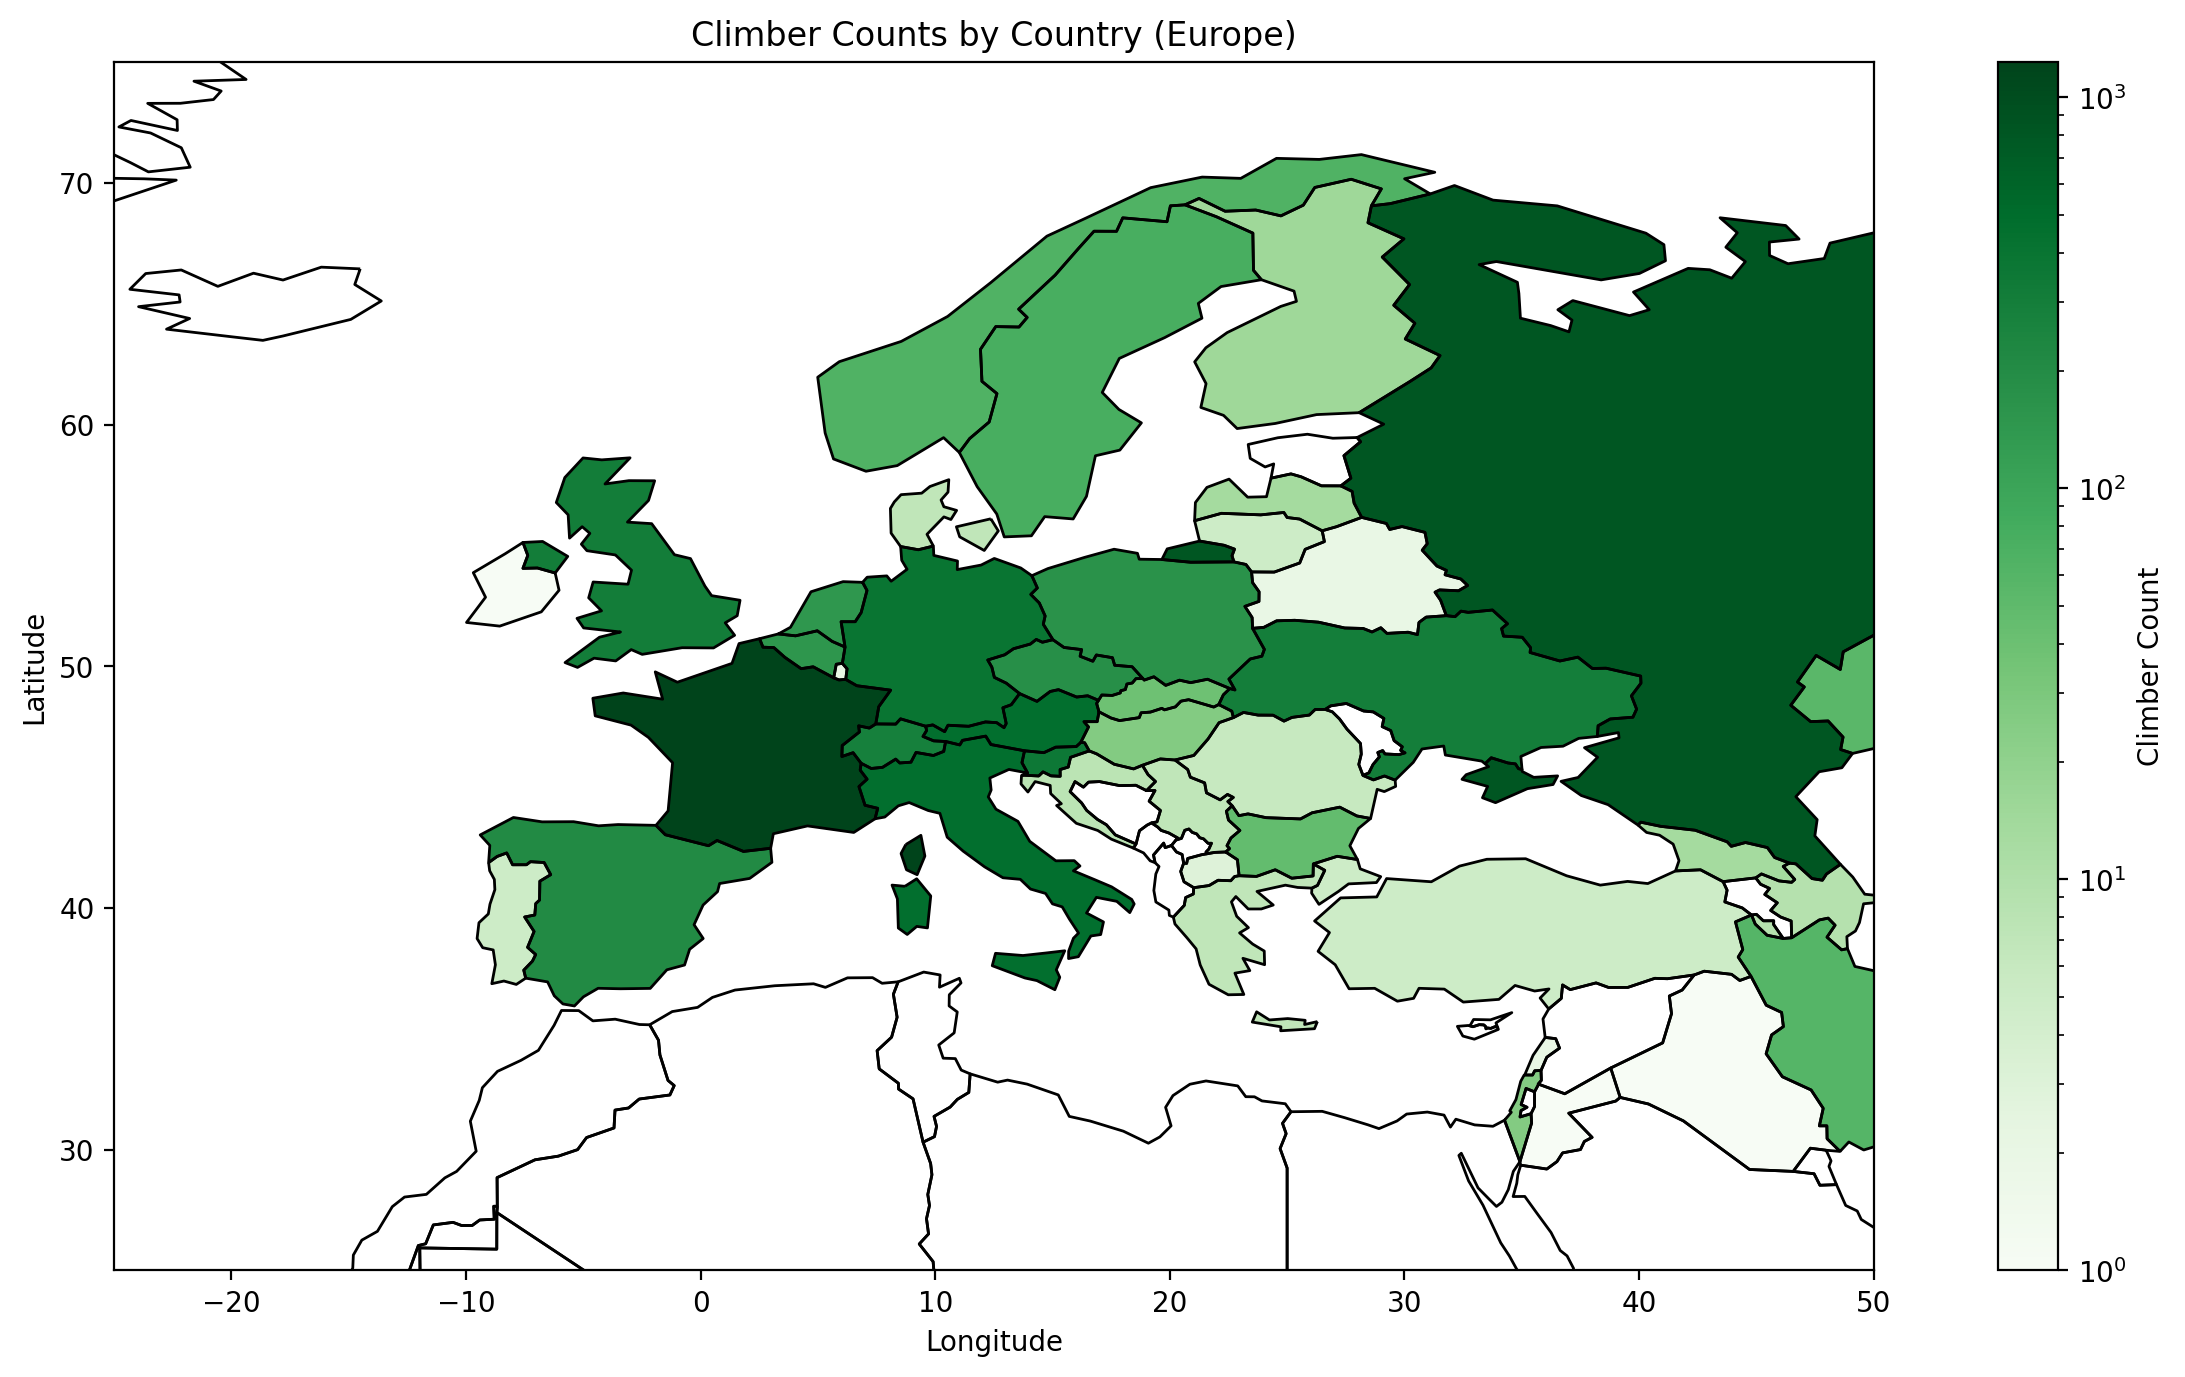

In [355]:
world = get_world()
athletes_per_country = ranked_athletes.country.value_counts().to_frame().merge(world, left_index=True, right_on='iso_a3').rename({'country': 'count'}, axis=1)
plot_map(gpd.GeoDataFrame(athletes_per_country), cmap='Greens', index='count', title='Climber Counts by Country', bar_label='Climber Count')
plot_map(gpd.GeoDataFrame(athletes_per_country), cmap='Greens', index='count', title='Climber Counts by Country (Europe)', bar_label='Climber Count', europe=True)

Text(0.5, 0, 'Country')

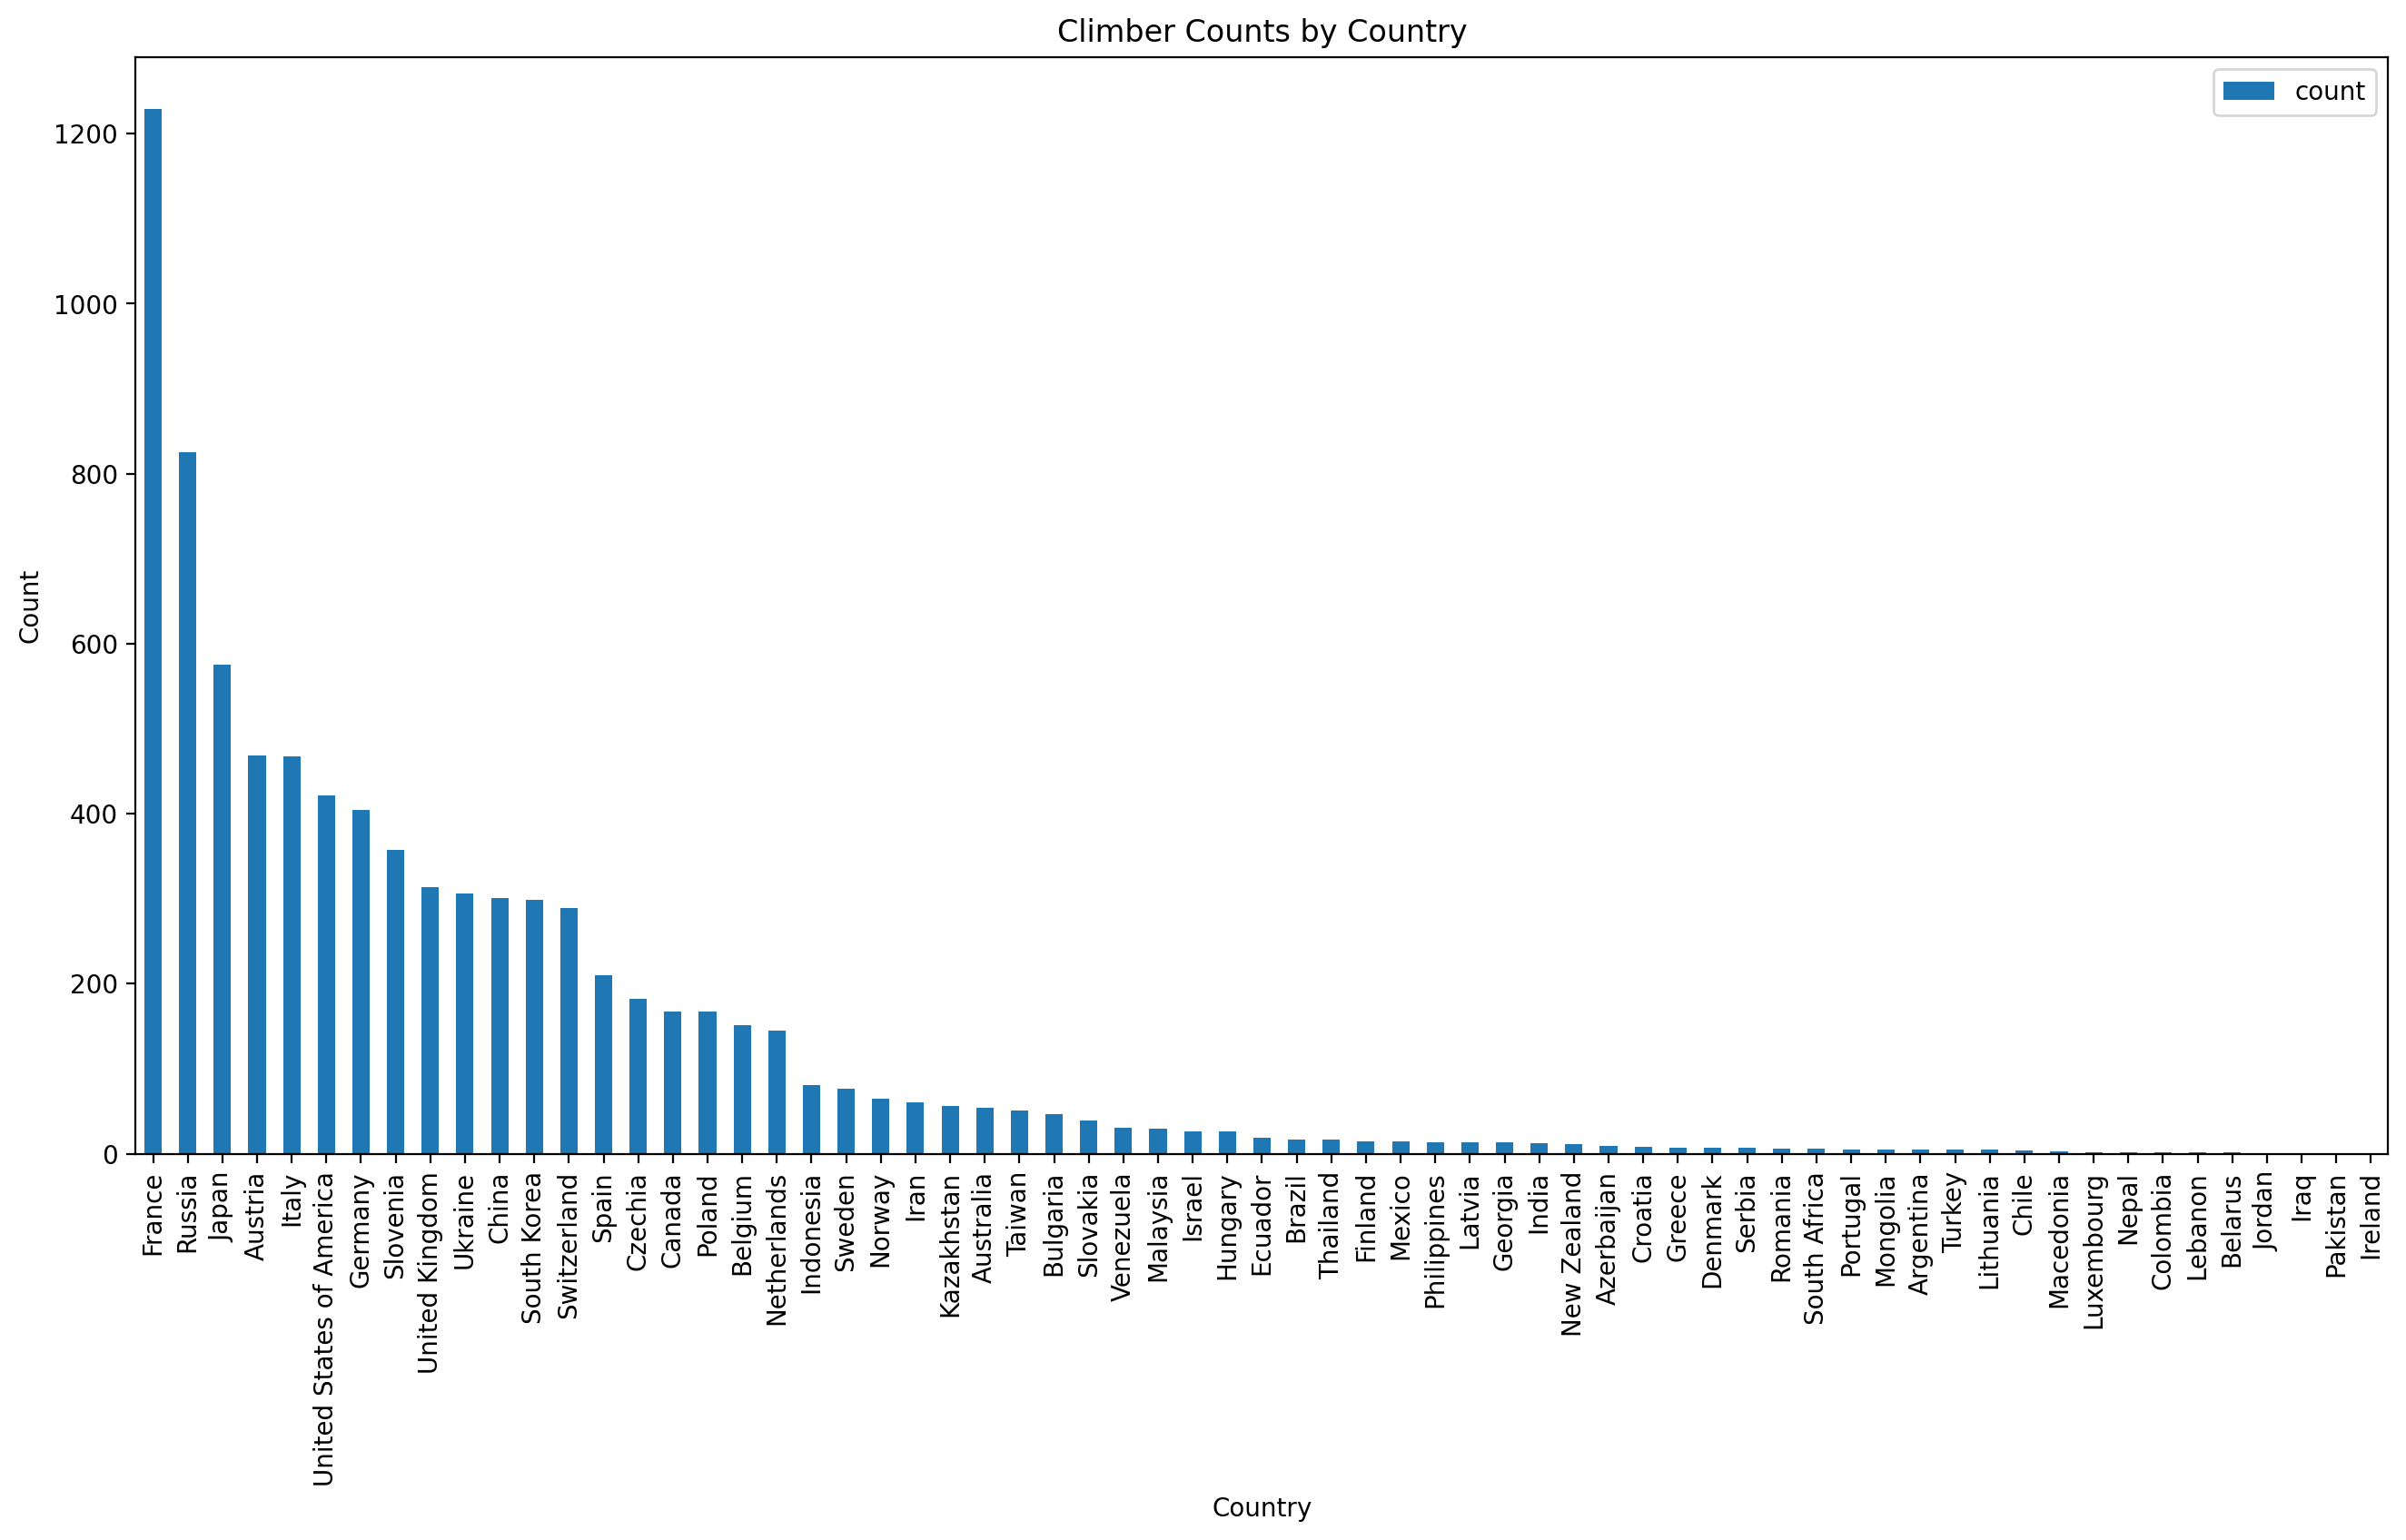

In [371]:
athletes_per_country.plot(kind='bar', x='name', y='count', title='Climber Counts by Country')
plt.ylabel('Count')
plt.xlabel('Country')

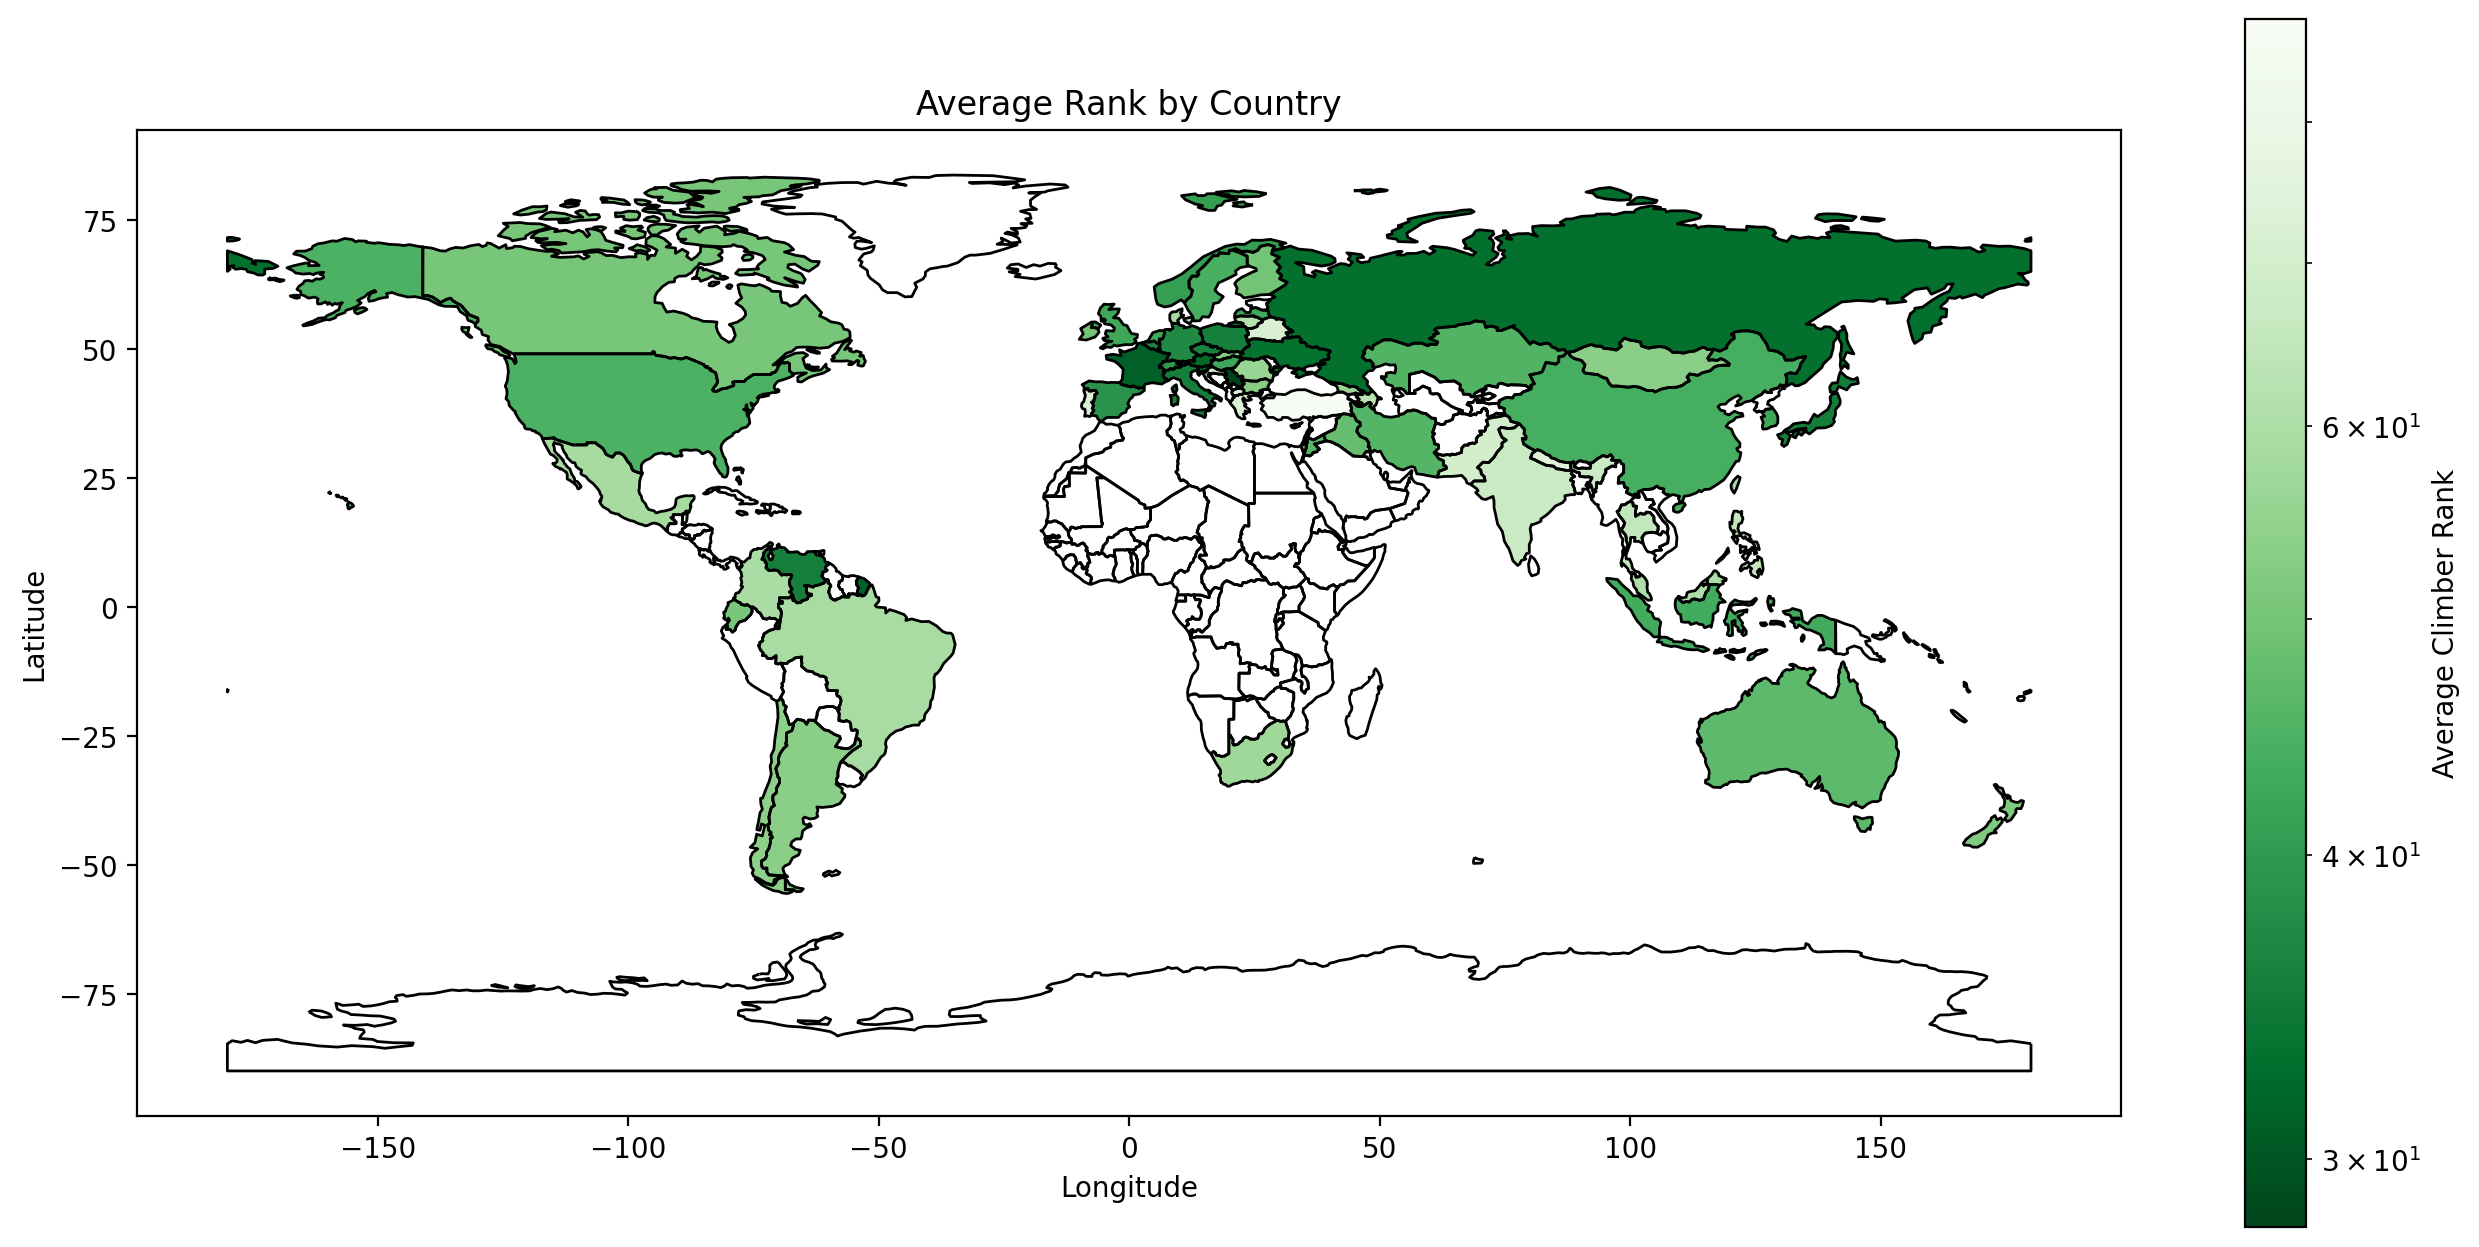

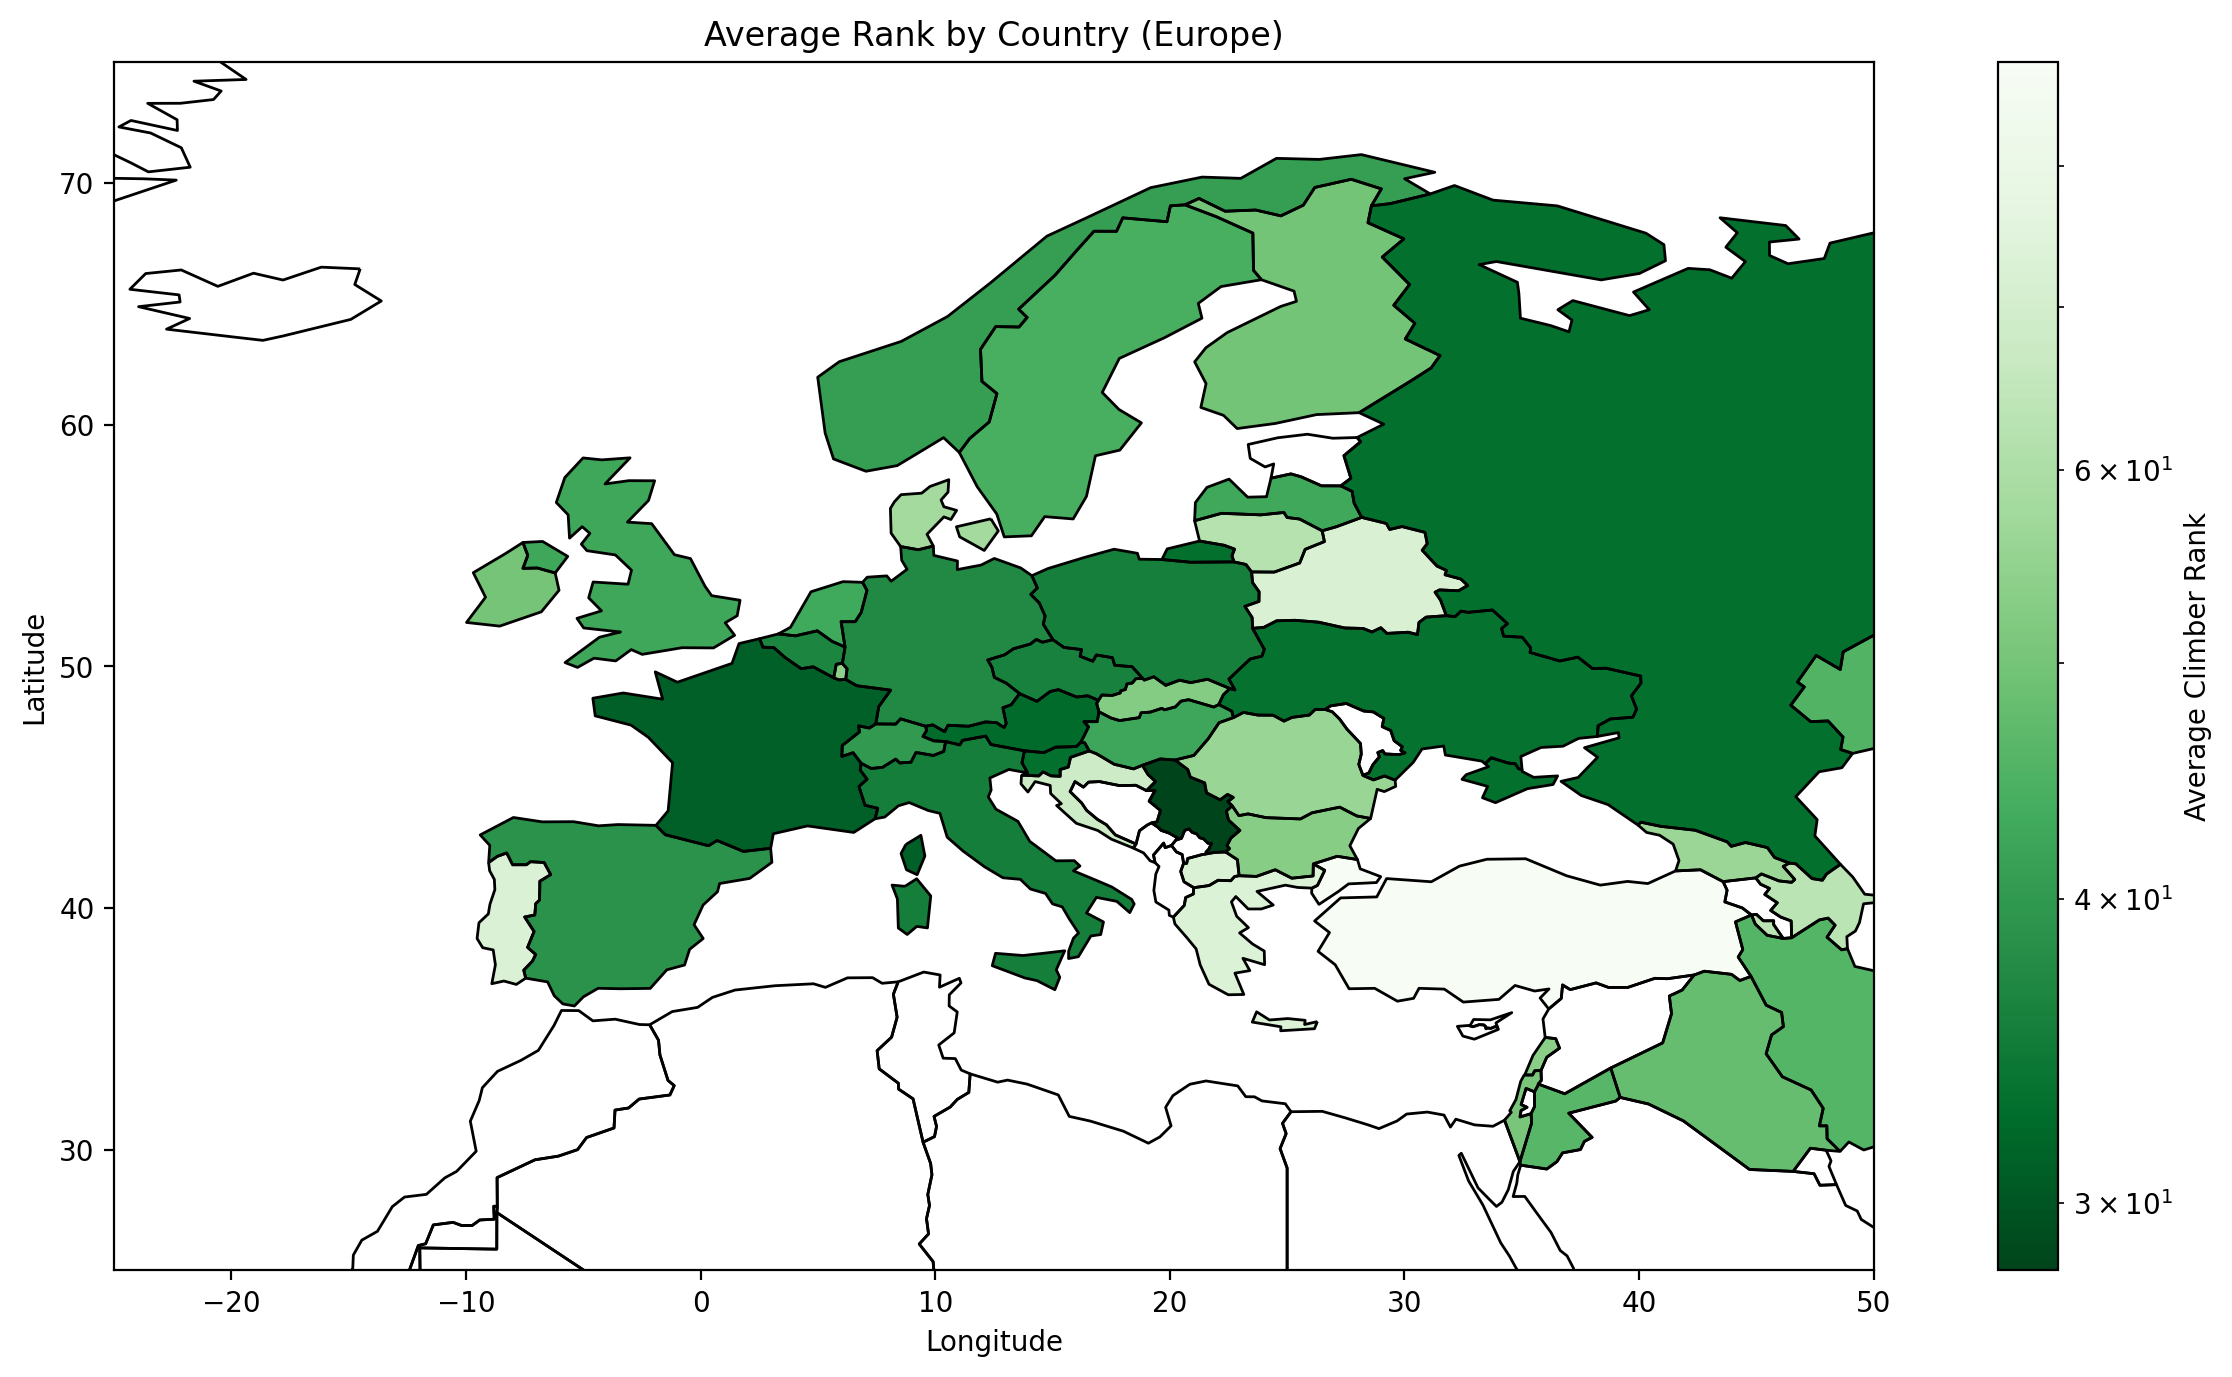

In [360]:
ranks_per_country = ranked_athletes.groupby('country')['Rank'].mean()
ranks_per_country = ranks_per_country.to_frame().merge(world, left_index=True, right_on='iso_a3')
world = get_world()
plot_map(gpd.GeoDataFrame(ranks_per_country), cmap='Greens_r', index='Rank', title='Average Rank by Country', bar_label='Average Climber Rank')
plot_map(gpd.GeoDataFrame(ranks_per_country), cmap='Greens_r', index='Rank', title='Average Rank by Country (Europe)', bar_label='Average Climber Rank', europe=True)

Text(0.5, 0, 'Country')

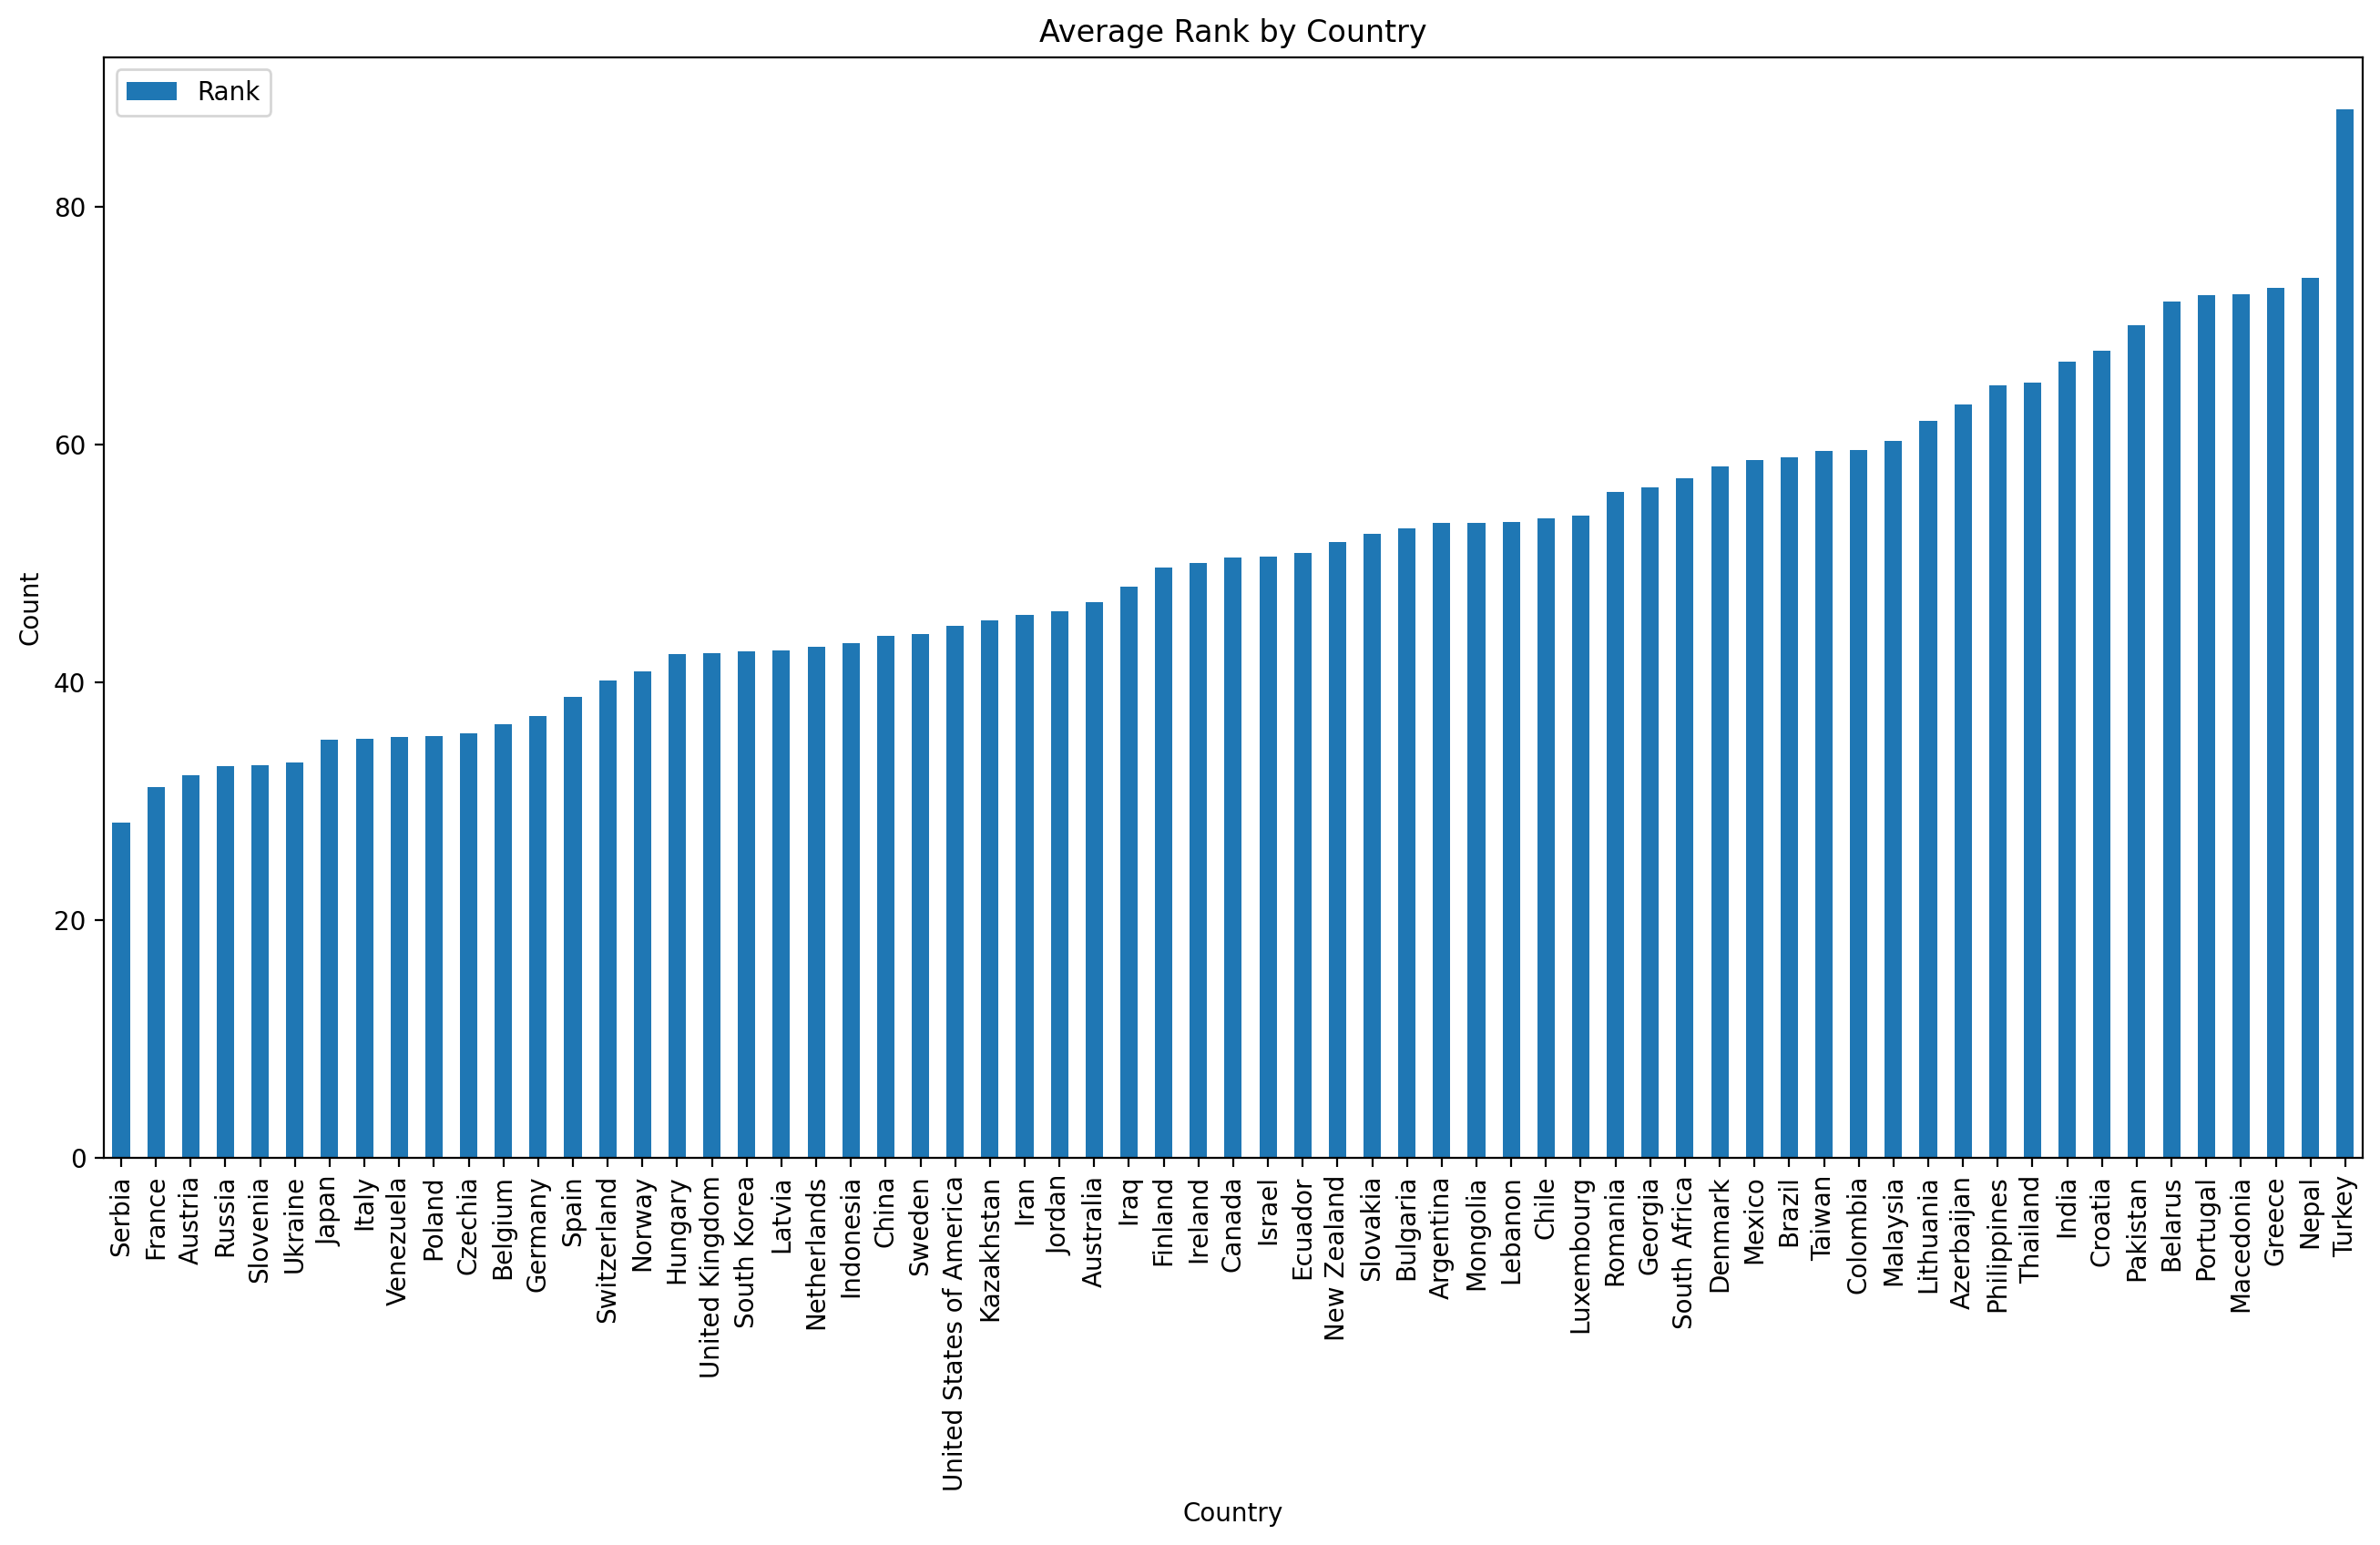

In [373]:
ranks_per_country.sort_values(by='Rank').plot(kind='bar', x='name', y='Rank', title='Average Rank by Country')
plt.ylabel('Count')
plt.xlabel('Country')

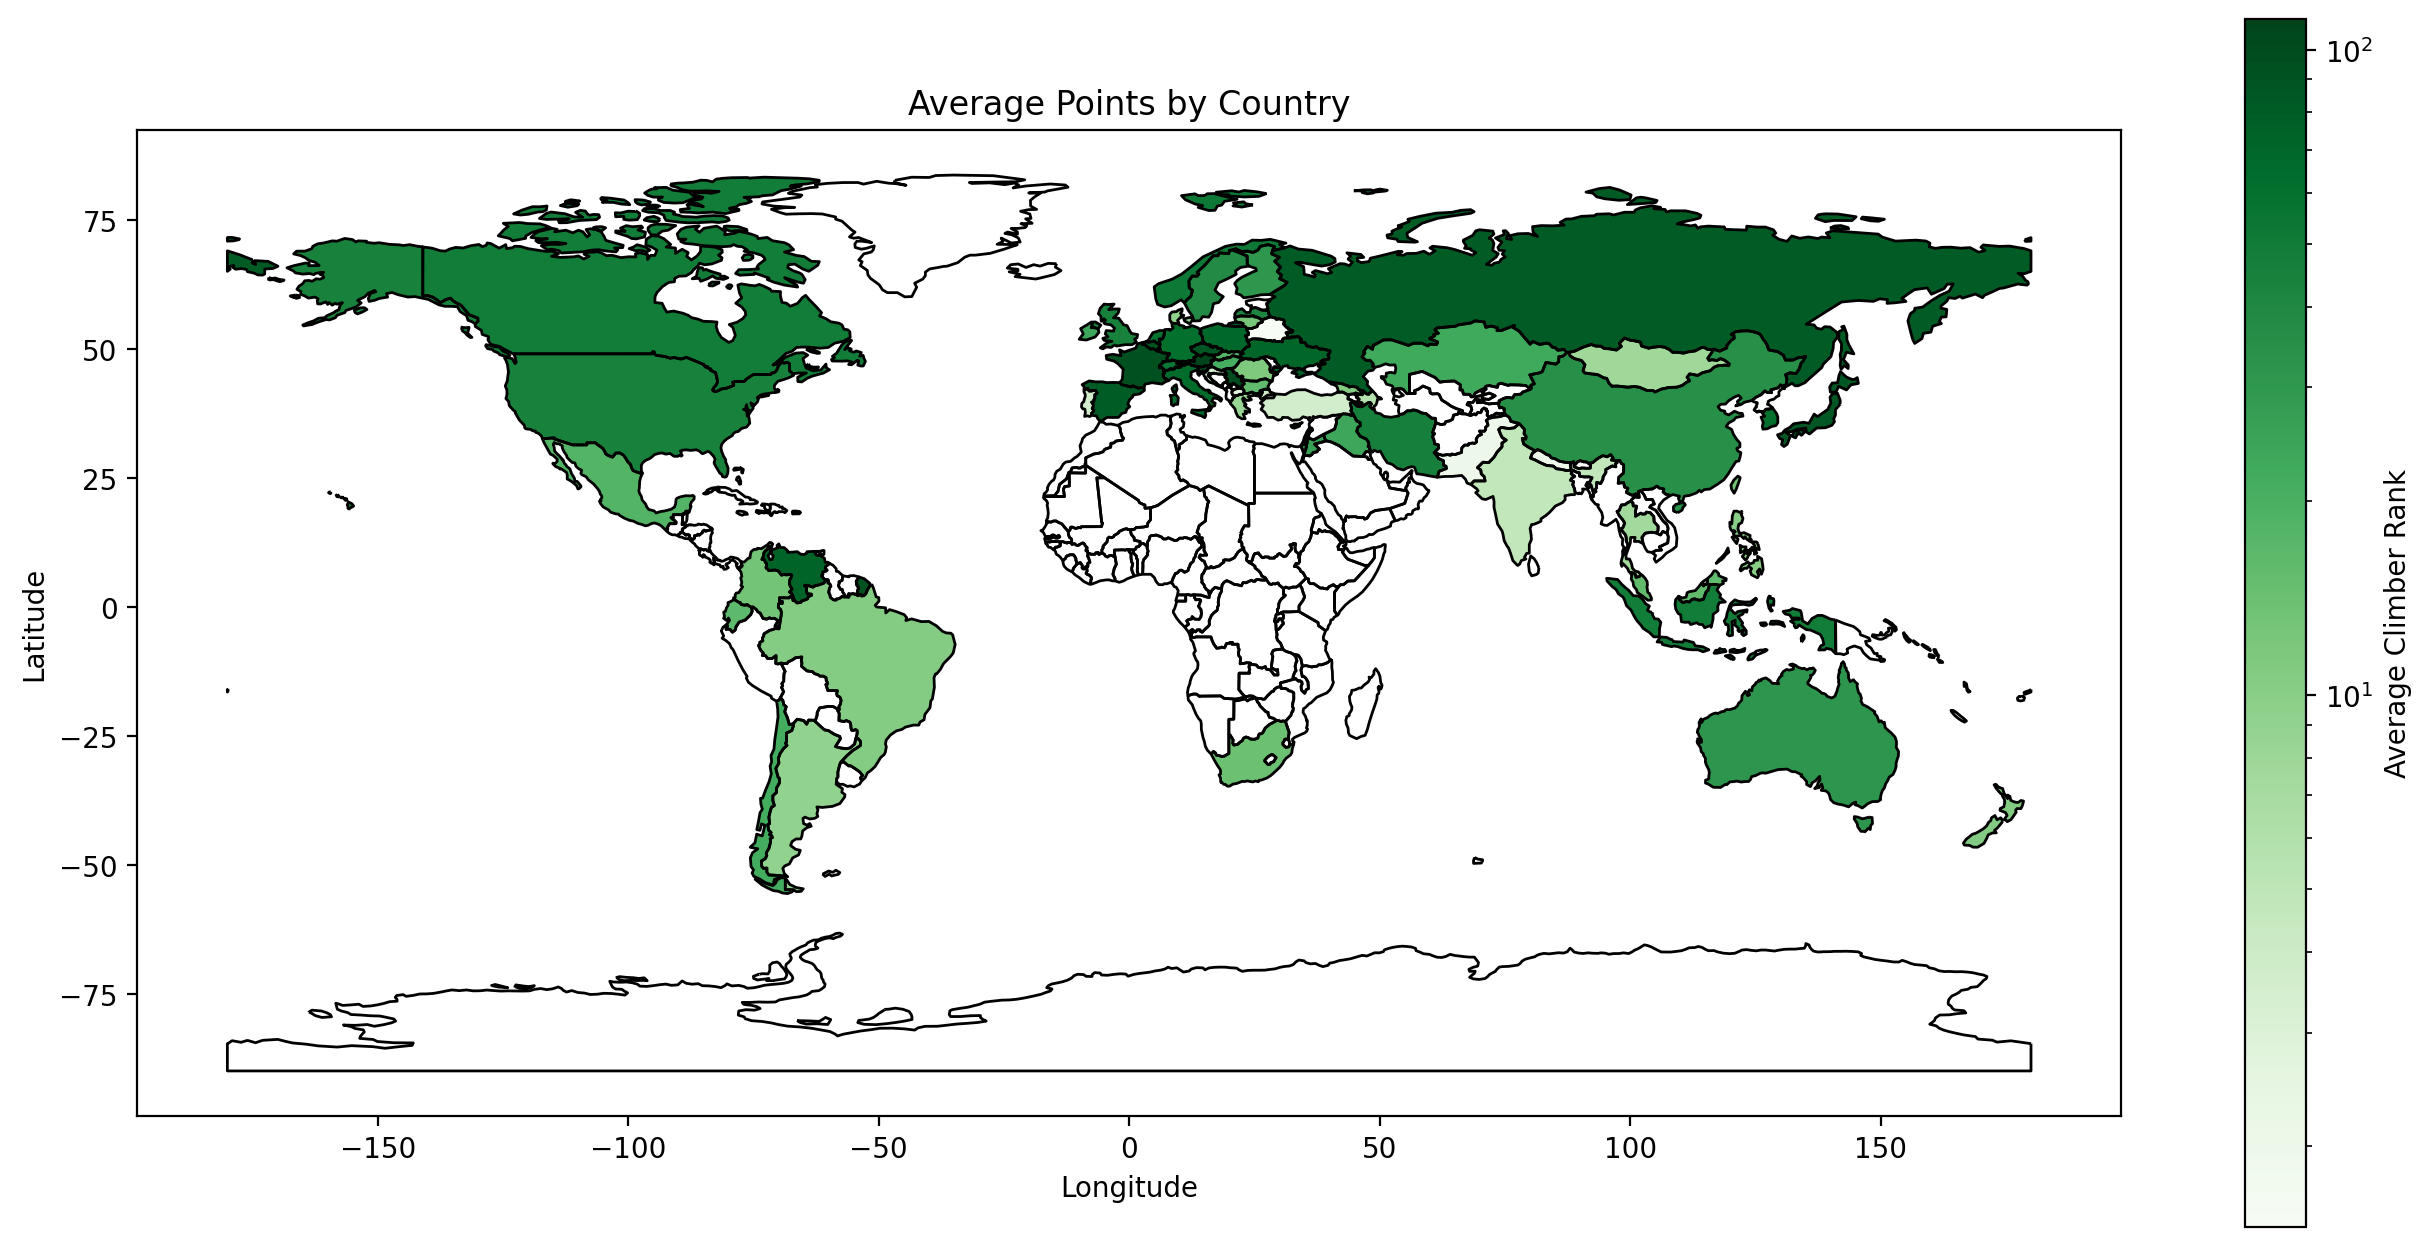

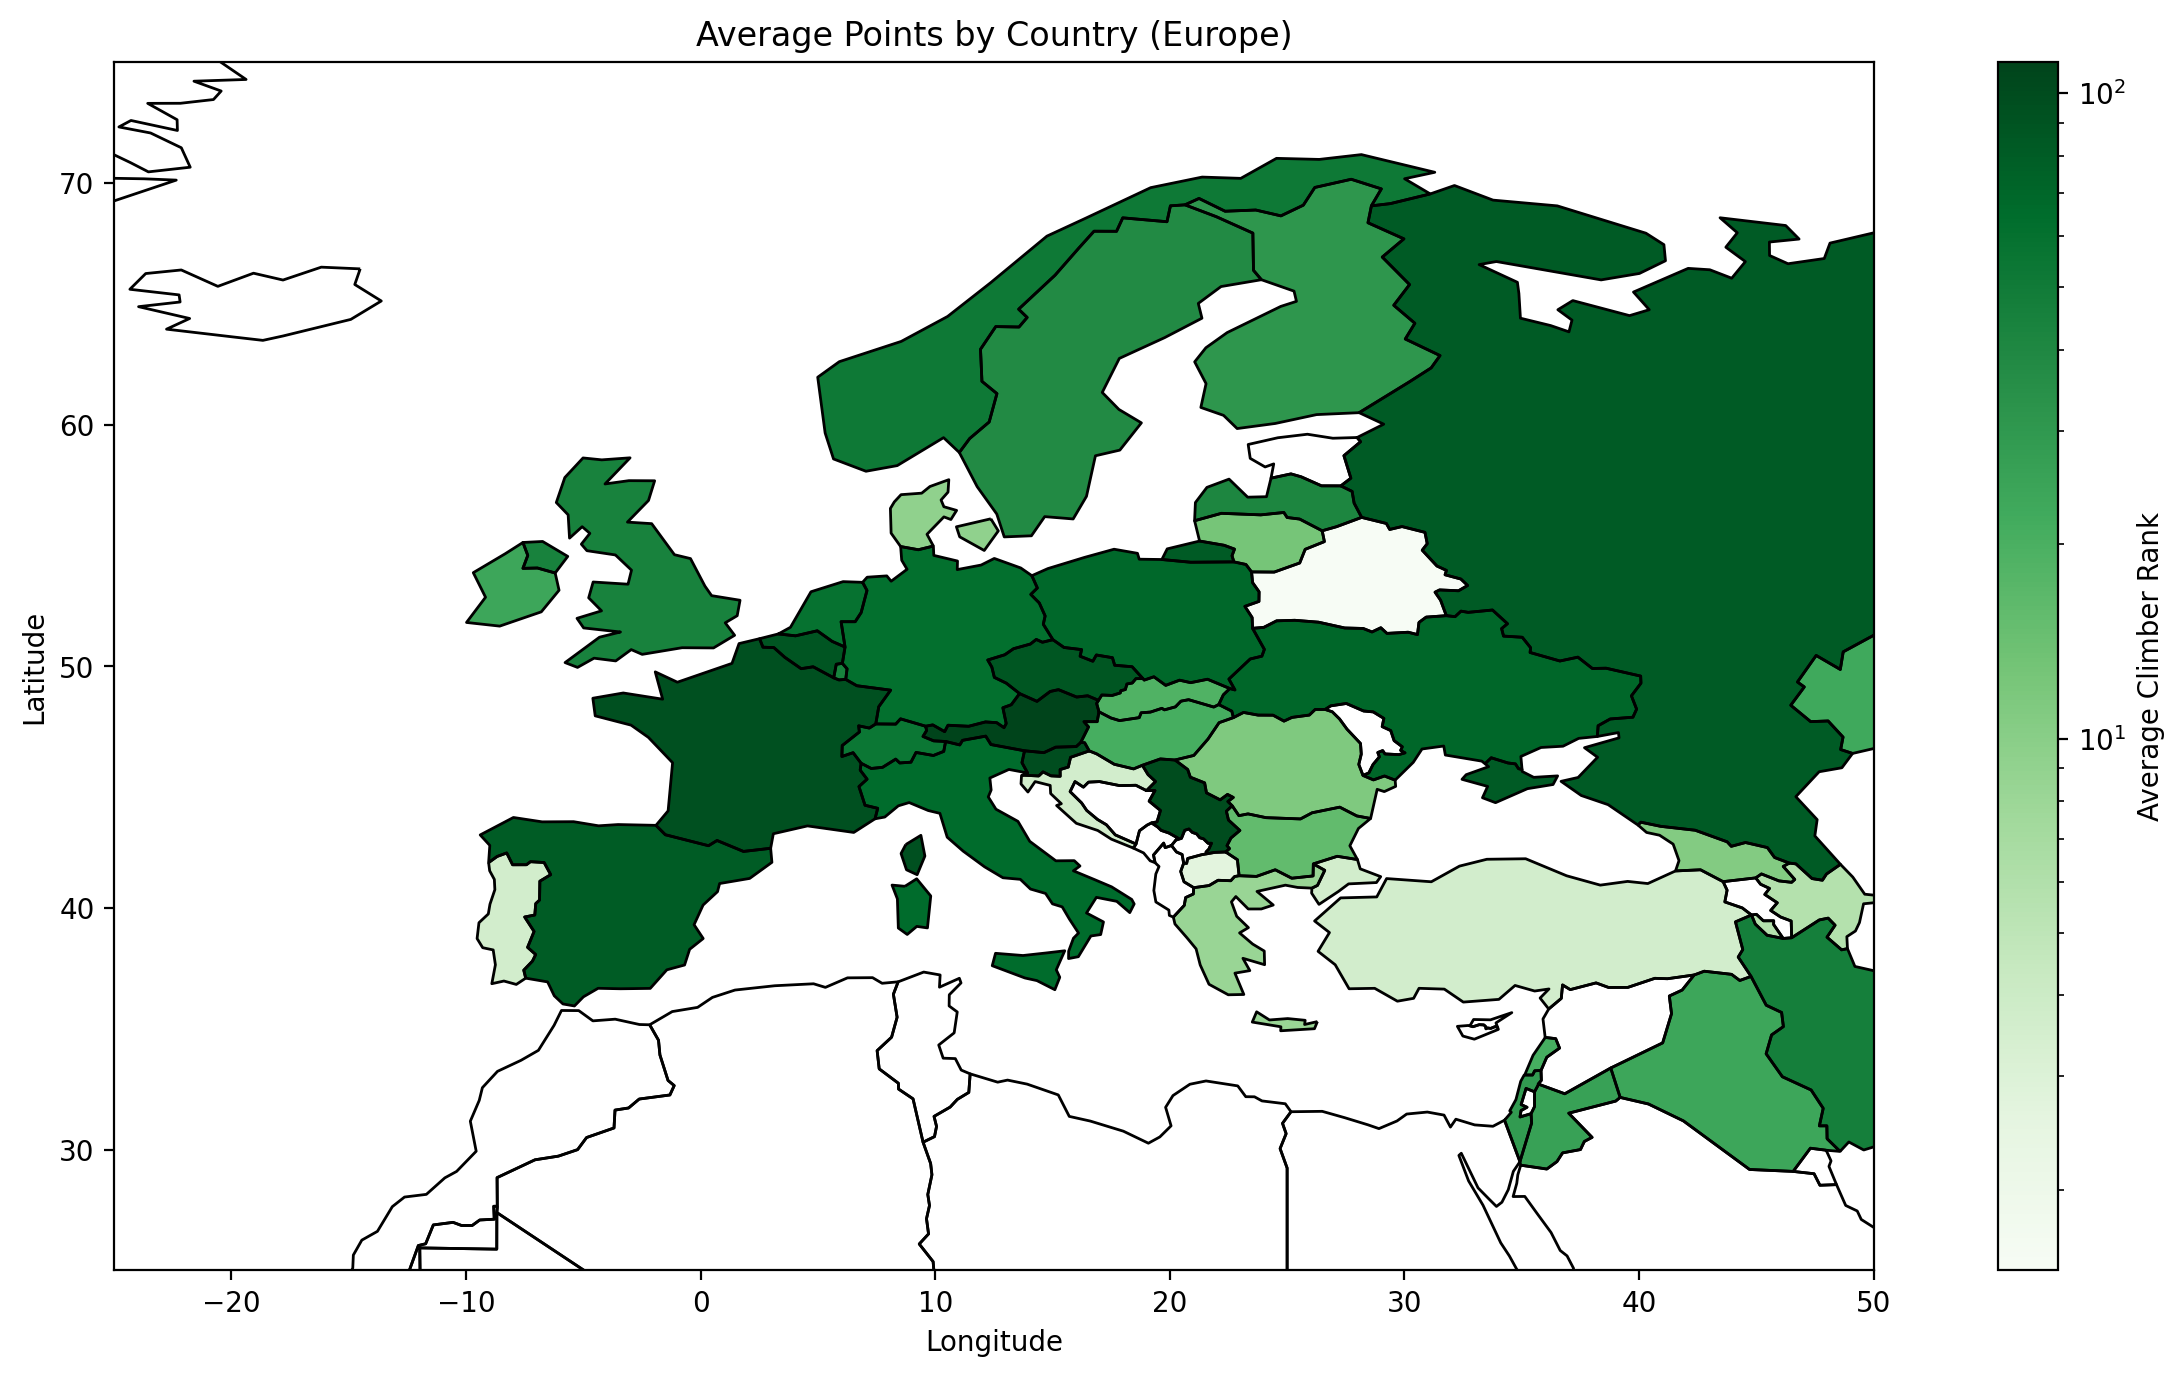

In [363]:
points_per_country = ranked_athletes.groupby('country')['Points'].mean()
points_per_country = points_per_country.to_frame().merge(world, left_index=True, right_on='iso_a3')
world = get_world()
plot_map(gpd.GeoDataFrame(points_per_country), cmap='Greens', index='Points', title='Average Points by Country', bar_label='Average Climber Rank')
plot_map(gpd.GeoDataFrame(points_per_country), cmap='Greens', index='Points', title='Average Points by Country (Europe)', bar_label='Average Climber Rank', europe=True)

Text(0.5, 0, 'Country')

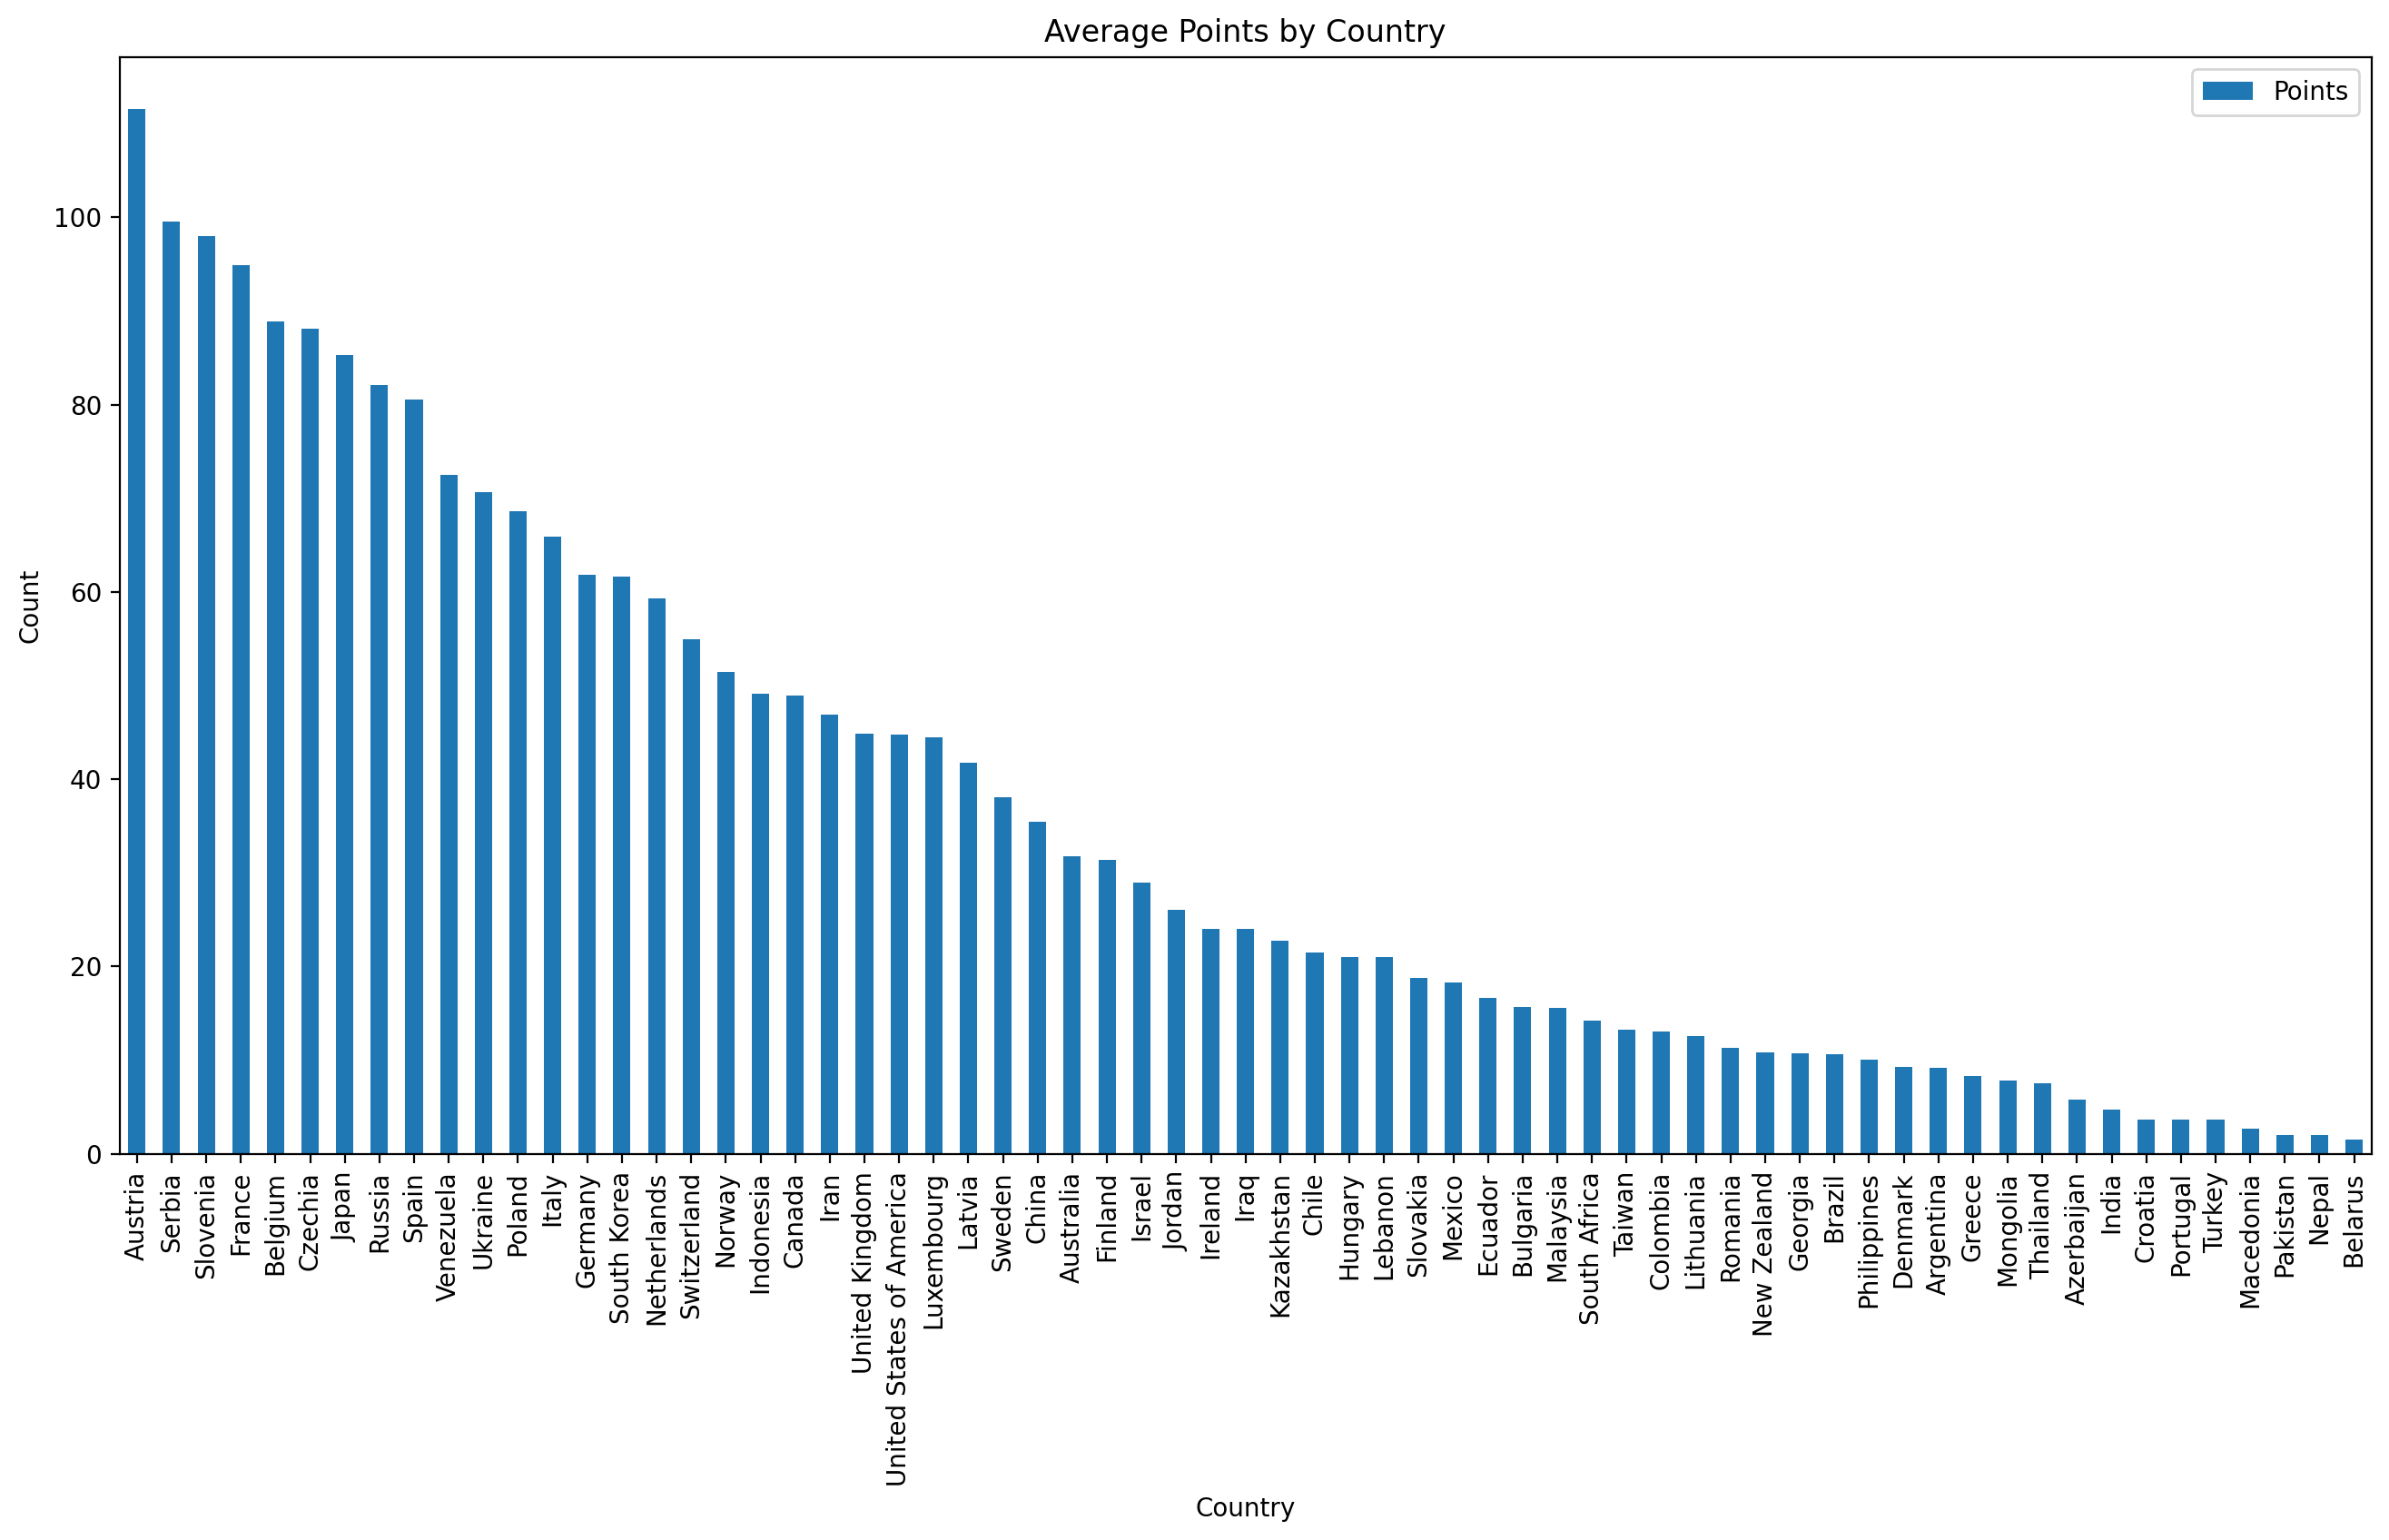

In [374]:
points_per_country.sort_values(by='Points', ascending=False).plot(kind='bar', x='name', y='Points', title='Average Points by Country')
plt.ylabel('Count')
plt.xlabel('Country')